#Behavioral patterns


In software engineering, behavioral design patterns are design patterns that identify common communication patterns between objects and realize these patterns. By doing so, these patterns increase flexibility in carrying out this communication.



#Chain of responsibility
A way of passing a request between a chain of objects (Source: https://sourcemaking.com/design_patterns/chain_of_responsibility)

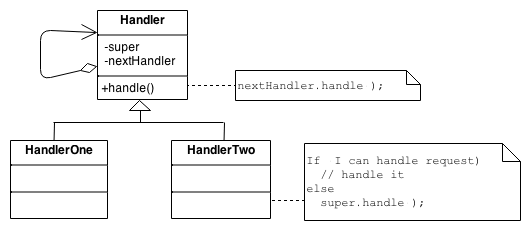

In [1]:
from abc import ABC, abstractmethod

# Handler interface
class Handler(ABC):
    def __init__(self, successor=None):
        self._successor = successor

    @abstractmethod
    def handle_request(self, request):
        pass

# Concrete Handler 1
class ConcreteHandler1(Handler):
    def handle_request(self, request):
        if request == "handler1":
            return f"ConcreteHandler1: Handling the request: {request}"
        elif self._successor is not None:
            return self._successor.handle_request(request)
        else:
            return "ConcreteHandler1: This request cannot be handled."

# Concrete Handler 2
class ConcreteHandler2(Handler):
    def handle_request(self, request):
        if request == "handler2":
            return f"ConcreteHandler2: Handling the request: {request}"
        elif self._successor is not None:
            return self._successor.handle_request(request)
        else:
            return "ConcreteHandler2: This request cannot be handled."

# Client code
if __name__ == "__main__":
    # Create the chain of handlers
    handler1 = ConcreteHandler1()
    handler2 = ConcreteHandler2(handler1)  # Setting successor

    # Send requests through the chain
    print(handler2.handle_request("handler1"))
    print(handler2.handle_request("handler2"))
    print(handler2.handle_request("handler3"))


ConcreteHandler1: Handling the request: handler1
ConcreteHandler2: Handling the request: handler2
ConcreteHandler1: This request cannot be handled.


#Command
Encapsulate a command request as an object (Source: https://sourcemaking.com/design_patterns/command)

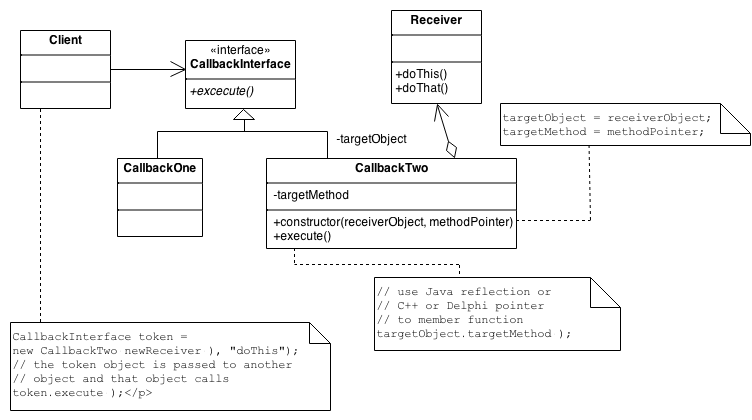

In [2]:
from abc import ABC, abstractmethod

# Command interface
class Command(ABC):
    @abstractmethod
    def execute(self):
        pass

# Concrete command classes
class LightOnCommand(Command):
    def __init__(self, light):
        self._light = light

    def execute(self):
        self._light.turn_on()

class LightOffCommand(Command):
    def __init__(self, light):
        self._light = light

    def execute(self):
        self._light.turn_off()

# Receiver class
class Light:
    def turn_on(self):
        print("Light is on.")

    def turn_off(self):
        print("Light is off.")

# Invoker class
class RemoteControl:
    def __init__(self):
        self._command = None

    def set_command(self, command):
        self._command = command

    def press_button(self):
        if self._command is not None:
            self._command.execute()

# Client code
if __name__ == "__main__":
    # Create receiver
    light = Light()

    # Create concrete command objects
    light_on_command = LightOnCommand(light)
    light_off_command = LightOffCommand(light)

    # Create invoker
    remote_control = RemoteControl()

    # Set commands for the invoker
    remote_control.set_command(light_on_command)
    remote_control.press_button()  # Turn on the light

    remote_control.set_command(light_off_command)
    remote_control.press_button()  # Turn off the light


Light is on.
Light is off.


#Interpreter
A way to include language elements in a program (Source: https://sourcemaking.com/design_patterns/interpreter)

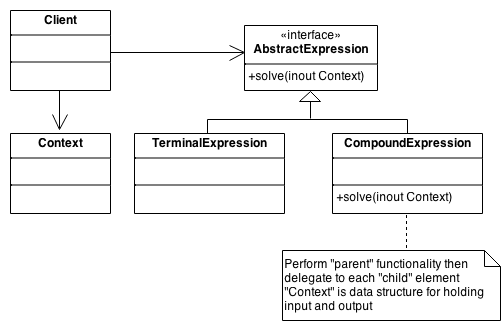

In [7]:
from abc import ABC, abstractmethod

# Context class
class Context:
    def __init__(self, input_string):
        self._input_string = input_string
        self._output = None

    def get_input_string(self):
        return self._input_string

    def set_output(self, output):
        self._output = output

    def get_output(self):
        return self._output

# Abstract expression class
class Expression(ABC):
    @abstractmethod
    def interpret(self, context):
        pass

# Terminal expression class
class TerminalExpression(Expression):
    def interpret(self, context):
        input_string = context.get_input_string()
        if self._data in input_string:
            context.set_output(input_string.replace(self._data, self._new_data))
        return context.get_output()

    def __init__(self, data, new_data):
        self._data = data
        self._new_data = new_data

# Non-terminal expression class
class NonterminalExpression(Expression):
    def interpret(self, context):
        input_string = context.get_input_string()
        if self._data in input_string:
            context.set_output(input_string.replace(self._data, self._new_data))
        return context.get_output()

    def __init__(self, data, new_data):
        self._data = data
        self._new_data = new_data

# Client code
if __name__ == "__main__":
    context = Context("Interpreter design pattern")
    terminal_expression = TerminalExpression("Interpreter", "Interpreter design")
    nonterminal_expression = NonterminalExpression("pattern", "design")

    print(terminal_expression.interpret(context))
    print(nonterminal_expression.interpret(context))


Interpreter design design pattern
Interpreter design design


#Iterator
Sequentially access the elements of a collection (Source: https://sourcemaking.com/design_patterns/iterator)

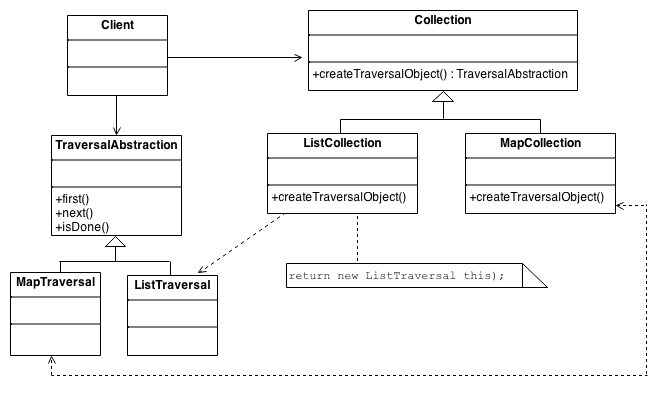

In [8]:
from abc import ABC, abstractmethod

# Iterator interface
class Iterator(ABC):
    @abstractmethod
    def has_next(self):
        pass

    @abstractmethod
    def next(self):
        pass

# Concrete Iterator
class ConcreteIterator(Iterator):
    def __init__(self, collection):
        self._collection = collection
        self._index = 0

    def has_next(self):
        return self._index < len(self._collection)

    def next(self):
        if self.has_next():
            item = self._collection[self._index]
            self._index += 1
            return item
        else:
            raise StopIteration("End of collection reached")

# Aggregate interface
class Aggregate(ABC):
    @abstractmethod
    def create_iterator(self):
        pass

# Concrete Aggregate
class ConcreteAggregate(Aggregate):
    def __init__(self):
        self._collection = []

    def add_item(self, item):
        self._collection.append(item)

    def create_iterator(self):
        return ConcreteIterator(self._collection)

# Client code
if __name__ == "__main__":
    aggregate = ConcreteAggregate()
    aggregate.add_item("Item 1")
    aggregate.add_item("Item 2")
    aggregate.add_item("Item 3")

    iterator = aggregate.create_iterator()

    while iterator.has_next():
        print(iterator.next())


Item 1
Item 2
Item 3


#Mediator
Defines simplified communication between classes (Source: https://sourcemaking.com/design_patterns/mediator)

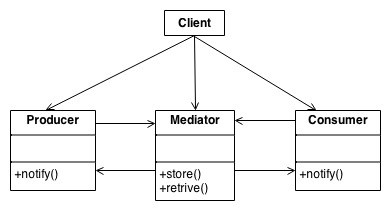

In [9]:
from abc import ABC, abstractmethod

# Mediator interface
class Mediator(ABC):
    @abstractmethod
    def notify(self, sender, event):
        pass

# Concrete Mediator
class ConcreteMediator(Mediator):
    def __init__(self):
        self._colleague1 = None
        self._colleague2 = None

    def set_colleague1(self, colleague1):
        self._colleague1 = colleague1

    def set_colleague2(self, colleague2):
        self._colleague2 = colleague2

    def notify(self, sender, event):
        if sender == self._colleague1:
            print("Mediator: Colleague 1 triggered event:", event)
            self._colleague2.receive_event(event)
        elif sender == self._colleague2:
            print("Mediator: Colleague 2 triggered event:", event)
            self._colleague1.receive_event(event)

# Colleague interface
class Colleague(ABC):
    def __init__(self, mediator):
        self._mediator = mediator

    @abstractmethod
    def trigger_event(self, event):
        pass

    @abstractmethod
    def receive_event(self, event):
        pass

# Concrete Colleague 1
class ConcreteColleague1(Colleague):
    def trigger_event(self, event):
        print("Colleague 1: Triggering event:", event)
        self._mediator.notify(self, event)

    def receive_event(self, event):
        print("Colleague 1: Received event:", event)

# Concrete Colleague 2
class ConcreteColleague2(Colleague):
    def trigger_event(self, event):
        print("Colleague 2: Triggering event:", event)
        self._mediator.notify(self, event)

    def receive_event(self, event):
        print("Colleague 2: Received event:", event)

# Client code
if __name__ == "__main__":
    # Create mediator
    mediator = ConcreteMediator()

    # Create colleagues and associate them with the mediator
    colleague1 = ConcreteColleague1(mediator)
    colleague2 = ConcreteColleague2(mediator)
    mediator.set_colleague1(colleague1)
    mediator.set_colleague2(colleague2)

    # Trigger events
    colleague1.trigger_event("Event A")
    colleague2.trigger_event("Event B")


Colleague 1: Triggering event: Event A
Mediator: Colleague 1 triggered event: Event A
Colleague 2: Received event: Event A
Colleague 2: Triggering event: Event B
Mediator: Colleague 2 triggered event: Event B
Colleague 1: Received event: Event B


#Memento
Capture and restore an object's internal state (Source: https://sourcemaking.com/design_patterns/memento)

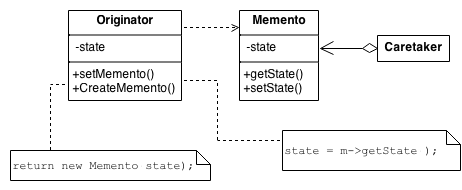

In [10]:
import copy

# Originator class
class Originator:
    def __init__(self):
        self._state = None

    def set_state(self, state):
        print("Originator: Setting state to", state)
        self._state = state

    def create_memento(self):
        print("Originator: Creating memento")
        return Memento(copy.deepcopy(self._state))

    def restore_from_memento(self, memento):
        print("Originator: Restoring state from memento")
        self._state = memento.get_state()

    def show_state(self):
        print("Originator: Current state is", self._state)

# Memento class
class Memento:
    def __init__(self, state):
        self._state = state

    def get_state(self):
        return self._state

# Caretaker class
class Caretaker:
    def __init__(self):
        self._mementos = []

    def add_memento(self, memento):
        self._mementos.append(memento)

    def get_memento(self, index):
        return self._mementos[index]

# Client code
if __name__ == "__main__":
    originator = Originator()
    caretaker = Caretaker()

    originator.set_state("State 1")
    originator.show_state()

    # Save the state
    memento1 = originator.create_memento()
    caretaker.add_memento(memento1)

    originator.set_state("State 2")
    originator.show_state()

    # Save the state
    memento2 = originator.create_memento()
    caretaker.add_memento(memento2)

    originator.set_state("State 3")
    originator.show_state()

    # Restore the first state
    memento = caretaker.get_memento(0)
    originator.restore_from_memento(memento)
    originator.show_state()


Originator: Setting state to State 1
Originator: Current state is State 1
Originator: Creating memento
Originator: Setting state to State 2
Originator: Current state is State 2
Originator: Creating memento
Originator: Setting state to State 3
Originator: Current state is State 3
Originator: Restoring state from memento
Originator: Current state is State 1


#Null Object
Designed to act as a default value of an object (Source: https://sourcemaking.com/design_patterns/null_object)

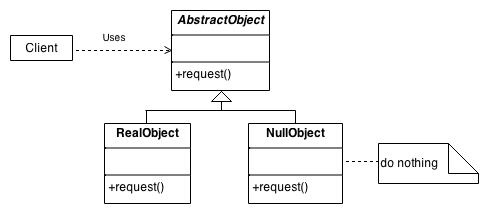

In [11]:
from abc import ABC, abstractmethod

# Abstract class or interface
class AbstractObject(ABC):
    @abstractmethod
    def do_something(self):
        pass

# Concrete class implementing the interface
class ConcreteObject(AbstractObject):
    def do_something(self):
        print("Doing something...")

# Null Object class implementing the interface
class NullObject(AbstractObject):
    def do_something(self):
        pass  # Do nothing

# Client code
if __name__ == "__main__":
    # Using a real object
    real_object = ConcreteObject()
    real_object.do_something()  # Output: Doing something...

    # Using a null object
    null_object = NullObject()
    null_object.do_something()  # No output, does nothing


Doing something...


#Observer
A way of notifying change to a number of classes (Source: https://sourcemaking.com/design_patterns/observer)

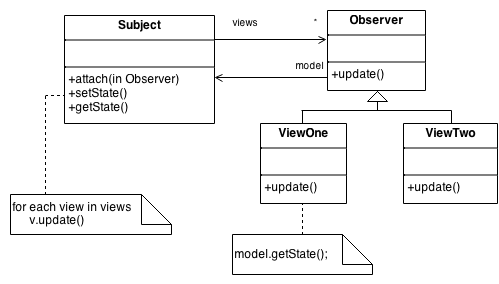

In [12]:
# Observer interface
class Observer:
    def update(self, subject):
        pass

# Subject class
class Subject:
    def __init__(self):
        self._observers = []

    def attach(self, observer):
        self._observers.append(observer)

    def detach(self, observer):
        self._observers.remove(observer)

    def notify(self):
        for observer in self._observers:
            observer.update(self)

    def some_business_logic(self):
        self.notify()

# Concrete observer classes
class ConcreteObserverA(Observer):
    def update(self, subject):
        print("ConcreteObserverA: Reacting to the subject's change")

class ConcreteObserverB(Observer):
    def update(self, subject):
        print("ConcreteObserverB: Reacting to the subject's change")

# Client code
if __name__ == "__main__":
    subject = Subject()

    observer1 = ConcreteObserverA()
    observer2 = ConcreteObserverB()

    subject.attach(observer1)
    subject.attach(observer2)

    subject.some_business_logic()

    subject.detach(observer2)

    subject.some_business_logic()


ConcreteObserverA: Reacting to the subject's change
ConcreteObserverB: Reacting to the subject's change
ConcreteObserverA: Reacting to the subject's change


#State
Alter an object's behavior when its state changes (Source: https://sourcemaking.com/design_patterns/state)

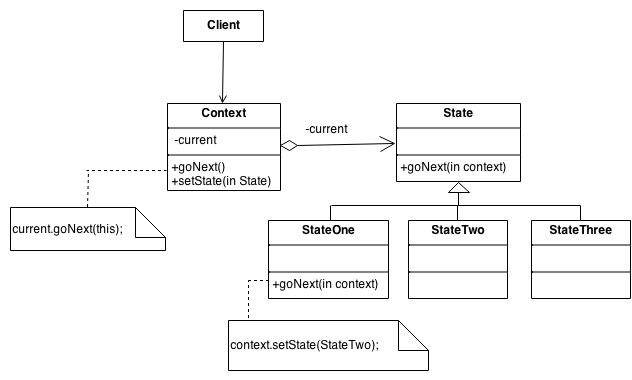

In [13]:
from abc import ABC, abstractmethod

# Context class
class Context:
    def __init__(self, state):
        self._state = state

    def request(self):
        self._state.handle()

    def set_state(self, state):
        self._state = state

# State interface
class State(ABC):
    @abstractmethod
    def handle(self):
        pass

# Concrete state classes
class ConcreteStateA(State):
    def handle(self):
        print("ConcreteStateA is handling the request.")
        # Optionally, transition to another state
        # context.set_state(ConcreteStateB())

class ConcreteStateB(State):
    def handle(self):
        print("ConcreteStateB is handling the request.")
        # Optionally, transition to another state
        # context.set_state(ConcreteStateA())

# Client code
if __name__ == "__main__":
    # Initial state
    initial_state = ConcreteStateA()

    # Create context with initial state
    context = Context(initial_state)

    # Request handled by current state
    context.request()  # Output: ConcreteStateA is handling the request.

    # Change state
    context.set_state(ConcreteStateB())

    # Request handled by new state
    context.request()  # Output: ConcreteStateB is handling the request.


ConcreteStateA is handling the request.
ConcreteStateB is handling the request.


#Strategy
Encapsulates an algorithm inside a class (Source: https://sourcemaking.com/design_patterns/strategy)

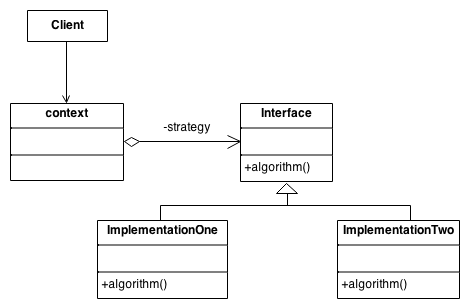

In [14]:
from abc import ABC, abstractmethod

# Context class
class Context:
    def __init__(self, strategy):
        self._strategy = strategy

    def set_strategy(self, strategy):
        self._strategy = strategy

    def execute_strategy(self, data):
        return self._strategy.execute(data)

# Strategy interface
class Strategy(ABC):
    @abstractmethod
    def execute(self, data):
        pass

# Concrete strategy classes
class ConcreteStrategyA(Strategy):
    def execute(self, data):
        return f"ConcreteStrategyA: {data} (executed with strategy A)"

class ConcreteStrategyB(Strategy):
    def execute(self, data):
        return f"ConcreteStrategyB: {data} (executed with strategy B)"

# Client code
if __name__ == "__main__":
    # Create context with initial strategy
    context = Context(ConcreteStrategyA())

    # Execute strategy A
    result_a = context.execute_strategy("Data for strategy A")
    print(result_a)  # Output: ConcreteStrategyA: Data for strategy A (executed with strategy A)

    # Change strategy
    context.set_strategy(ConcreteStrategyB())

    # Execute strategy B
    result_b = context.execute_strategy("Data for strategy B")
    print(result_b)  # Output: ConcreteStrategyB: Data for strategy B (executed with strategy B)


ConcreteStrategyA: Data for strategy A (executed with strategy A)
ConcreteStrategyB: Data for strategy B (executed with strategy B)


#Template method
Defer the exact steps of an algorithm to a subclass (Source: https://sourcemaking.com/design_patterns/template_method)

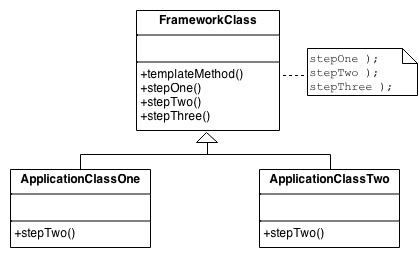

In [15]:
from abc import ABC, abstractmethod

# Abstract class defining the template method
class AbstractClass(ABC):
    def template_method(self):
        self.step_one()
        self.step_two()
        self.step_three()

    @abstractmethod
    def step_one(self):
        pass

    @abstractmethod
    def step_two(self):
        pass

    @abstractmethod
    def step_three(self):
        pass

# Concrete subclass implementing specific steps
class ConcreteClass1(AbstractClass):
    def step_one(self):
        print("ConcreteClass1: Step one")

    def step_two(self):
        print("ConcreteClass1: Step two")

    def step_three(self):
        print("ConcreteClass1: Step three")

# Concrete subclass implementing specific steps
class ConcreteClass2(AbstractClass):
    def step_one(self):
        print("ConcreteClass2: Step one")

    def step_two(self):
        print("ConcreteClass2: Step two")

    def step_three(self):
        print("ConcreteClass2: Step three")

# Client code
if __name__ == "__main__":
    # Create ConcreteClass1 object and execute its template method
    print("Executing template method for ConcreteClass1:")
    concrete1 = ConcreteClass1()
    concrete1.template_method()

    print()

    # Create ConcreteClass2 object and execute its template method
    print("Executing template method for ConcreteClass2:")
    concrete2 = ConcreteClass2()
    concrete2.template_method()


Executing template method for ConcreteClass1:
ConcreteClass1: Step one
ConcreteClass1: Step two
ConcreteClass1: Step three

Executing template method for ConcreteClass2:
ConcreteClass2: Step one
ConcreteClass2: Step two
ConcreteClass2: Step three


#Visitor
Defines a new operation to a class without change (Source: https://sourcemaking.com/design_patterns/visitor)

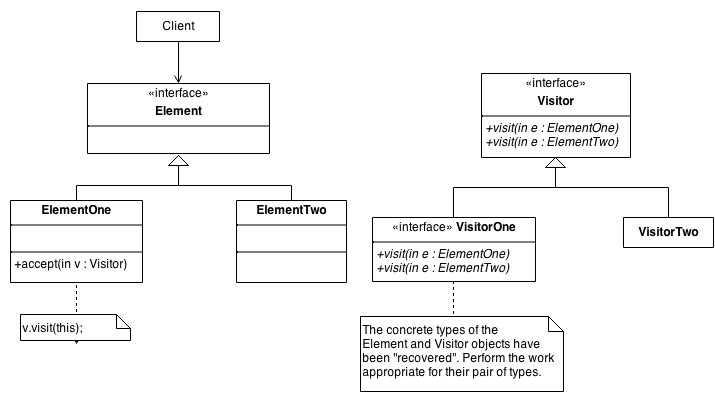

In [16]:
from abc import ABC, abstractmethod

# Element interface
class Element(ABC):
    @abstractmethod
    def accept(self, visitor):
        pass

# Concrete elements
class ConcreteElementA(Element):
    def accept(self, visitor):
        visitor.visit_concrete_element_a(self)

    def operation_a(self):
        print("ConcreteElementA operation")

class ConcreteElementB(Element):
    def accept(self, visitor):
        visitor.visit_concrete_element_b(self)

    def operation_b(self):
        print("ConcreteElementB operation")

# Visitor interface
class Visitor(ABC):
    @abstractmethod
    def visit_concrete_element_a(self, element_a):
        pass

    @abstractmethod
    def visit_concrete_element_b(self, element_b):
        pass

# Concrete visitor
class ConcreteVisitor(Visitor):
    def visit_concrete_element_a(self, element_a):
        print("ConcreteVisitor visiting ConcreteElementA")
        element_a.operation_a()

    def visit_concrete_element_b(self, element_b):
        print("ConcreteVisitor visiting ConcreteElementB")
        element_b.operation_b()

# Client code
if __name__ == "__main__":
    elements = [ConcreteElementA(), ConcreteElementB()]
    visitor = ConcreteVisitor()

    for element in elements:
        element.accept(visitor)


ConcreteVisitor visiting ConcreteElementA
ConcreteElementA operation
ConcreteVisitor visiting ConcreteElementB
ConcreteElementB operation
